## Random_Forest

In [1]:
# 라이브러리 로드
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.inspection import permutation_importance
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import time
import warnings
warnings.filterwarnings('ignore')

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

import seaborn as sns
%matplotlib inline

In [20]:
# 데이터 로딩
pdf = pd.read_csv('./data/model_01_up.csv', encoding='utf-8')

In [21]:
pdf

,일시,WIND_SPEED,GUST_WIND,SIG_WAVE,MAX_WAVE,HPA,특보강도
0,2012-04-21 18:00:00,5.5,12.7,1.1,1.7,1007.0,1.0
1,2018-08-17 07:00:00,10.6,15.2,0.7,1.1,1012.9,1.0
2,2018-06-10 12:00:00,6.5,15.2,0.8,1.2,1005.4,1.0
3,2018-05-20 12:00:00,10.7,18.8,0.8,1.1,1019.9,1.0
4,2015-11-25 09:00:00,6.4,13.3,0.9,1.4,1019.2,1.0
...,...,...,...,...,...,...,...
131095,2018-10-05 02:00:00,8.7,12.3,1.0,1.5,1020.5,0.0
131096,2018-10-05 03:00:00,8.0,12.6,0.9,1.4,1019.9,0.0
131097,2018-10-05 04:00:00,9.6,13.7,1.2,1.8,1019.2,0.0
131098,2018-10-05 05:00:00,9.1,13.7,1.3,2.0,1018.8,0.0


In [22]:
# 데이터셋
data = pdf[['WIND_SPEED', 'GUST_WIND', 'SIG_WAVE', 'MAX_WAVE', 'HPA']]
target = pdf['특보강도']

In [23]:
# 훈련세트와 테스트 세트로 나누기
pdf = train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [24]:
# 교차 검증 수행 (훈련세트와 검증세트 점수 비교해서 과대적합 파악)
rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target,
                        return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))


0.9999713958810069 0.9875476735316552


In [25]:
# 랜덤 포레스트 특성 중요도 출력
# 결정트리랑 비교 해보기
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.13494707 0.27603771 0.18276388 0.23200709 0.17424426]


In [26]:
# OOB 점수를 출력
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)
rf.fit(train_input, train_target)
print(rf.oob_score_)

0.9904938977879482


In [27]:
# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)

rf_clf.fit(train_input , train_target)

pred = rf_clf.predict(test_input)

accuracy = accuracy_score(test_target, pred)

print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9900


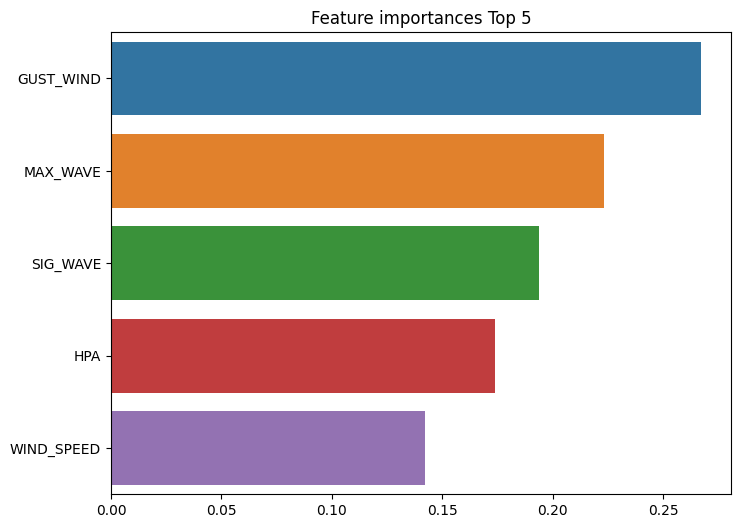

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=train_input.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 5')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

## Extra Tree

In [10]:
et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, train_input, train_target,
                        return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']),np.mean(scores['test_score']))

0.9999713958810069 0.9913615560640732


In [11]:
et.fit(train_input,train_target)
print(et.feature_importances_)

[0.16744315 0.28284732 0.17723882 0.20446836 0.16800235]


## Gradient Boosting

In [12]:
gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target,
                        return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8548507818459191 0.8539187643020595


In [13]:
# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(train_input, train_target)
gb_pred = gb_clf.predict(test_input)
gb_accuracy = accuracy_score(test_target, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))

GBM 정확도: 0.8532
GBM 수행 시간: 10.5 초 


In [14]:
test_target

array([0., 0., 0., ..., 0., 1., 0.])

In [15]:
gb_pred

array([0., 0., 0., ..., 1., 1., 0.])

In [16]:
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
scores = cross_validate(gb, train_input, train_target,
                        return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9057136727688787 0.9001239511823036


In [17]:
gb.fit(train_input, train_target)
print(gb.feature_importances_)

[0.02400748 0.23791027 0.17752381 0.48776493 0.07279351]
